<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Import" data-toc-modified-id="0.-Import-1">0. Import</a></span></li><li><span><a href="#1.-Датасет" data-toc-modified-id="1.-Датасет-2">1. Датасет</a></span><ul class="toc-item"><li><span><a href="#1.1-Описание-признаков" data-toc-modified-id="1.1-Описание-признаков-2.1">1.1 Описание признаков</a></span></li><li><span><a href="#1.2-Считывание-датасета" data-toc-modified-id="1.2-Считывание-датасета-2.2">1.2 Считывание датасета</a></span></li><li><span><a href="#1.3-Выбор-признаков" data-toc-modified-id="1.3-Выбор-признаков-2.3">1.3 Выбор признаков</a></span></li></ul></li><li><span><a href="#2.-AutoML" data-toc-modified-id="2.-AutoML-3">2. AutoML</a></span></li><li><span><a href="#3.-Модели" data-toc-modified-id="3.-Модели-4">3. Модели</a></span><ul class="toc-item"><li><span><a href="#3.1-LogisticRegression" data-toc-modified-id="3.1-LogisticRegression-4.1">3.1 LogisticRegression</a></span></li><li><span><a href="#3.2-LinearRegression" data-toc-modified-id="3.2-LinearRegression-4.2">3.2 LinearRegression</a></span></li><li><span><a href="#3.3-RandomForestClassifier" data-toc-modified-id="3.3-RandomForestClassifier-4.3">3.3 RandomForestClassifier</a></span></li><li><span><a href="#3.4-LGBMClassifier" data-toc-modified-id="3.4-LGBMClassifier-4.4">3.4 LGBMClassifier</a></span></li><li><span><a href="#3.5-XGBClassifier" data-toc-modified-id="3.5-XGBClassifier-4.5">3.5 XGBClassifier</a></span></li><li><span><a href="#3.6-CatBoost" data-toc-modified-id="3.6-CatBoost-4.6">3.6 CatBoost</a></span></li><li><span><a href="#3.7-NN" data-toc-modified-id="3.7-NN-4.7">3.7 NN</a></span></li></ul></li><li><span><a href="#4.-Результаты" data-toc-modified-id="4.-Результаты-5">4. Результаты</a></span><ul class="toc-item"><li><span><a href="#4.1-Таблица-результатов" data-toc-modified-id="4.1-Таблица-результатов-5.1">4.1 Таблица результатов</a></span></li><li><span><a href="#4.2-Настройка-лучшей-модели" data-toc-modified-id="4.2-Настройка-лучшей-модели-5.2">4.2 Настройка лучшей модели</a></span></li><li><span><a href="#4.3-Выводы" data-toc-modified-id="4.3-Выводы-5.3">4.3 Выводы</a></span></li></ul></li></ul></div>

# 0. Import

In [1]:
import pandas as pd, numpy as np, re, scipy.stats as stats
import seaborn as sns, matplotlib.pyplot as plt, plotly.express as px
from collections import Counter
from tqdm import tqdm


from sklearn import decomposition
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectPercentile
from mlxtend.feature_selection import SequentialFeatureSelector


import warnings
warnings.filterwarnings('ignore')

# 1. Датасет

## 1.1 Описание признаков

> Источник данных - https://www.kaggle.com/datasets/lampubhutia/loandefault-ltfs-avml-finhack?select=train_LTFS.csv

Признаки:
* UniqueID Identifier for customers
* loan_default Payment default in the first EMI on due date
* disbursed_amount Amount of Loan disbursed
* asset_cost Cost of the Asset
* ltv Loan to Value of the asset
* branch_id Branch where the loan was disbursed
* supplier_id Vehicle Dealer where the loan was disbursed
* manufacturer_id Vehicle manufacturer(Hero, Honda, TVS etc.)
* Current_pincode Current pincode of the customer
* Date.of.Birth Date of birth of the customer
* Employment.Type Employment Type of the customer (Salaried/Self Employed)
* DisbursalDate Date of disbursement
* State_ID State of disbursement
* Employee_code_ID Employee of the organization who logged the disbursement
* MobileNo_Avl_Flag if Mobile no. was shared by the customer then flagged as 1
* Aadhar_flag if aadhar was shared by the customer then flagged as 1
* PAN_flag if pan was shared by the customer then flagged as 1
* VoterID_flag if voter was shared by the customer then flagged as 1
* Driving_flag if DL was shared by the customer then flagged as 1
* Passport_flag if passport was shared by the customer then flagged as 1
* PERFORM_CNS.SCORE Bureau Score
* PERFORM_CNS.SCORE.DESCRIPTION Bureau score description
* PRI.NO.OF.ACCTS count of total loans taken by the customer at the time of disbursement Primary accounts are those which the customer has taken for his personal use
* PRI.ACTIVE.ACCTS count of active loans taken by the customer at the time of disbursement
* PRI.OVERDUE.ACCTS count of default accounts at the time of disbursement
* PRI.CURRENT.BALANCE total Principal outstanding amount of the active loans at the time of disbursement
* PRI.SANCTIONED.AMOUNT total amount that was sanctioned for all the loans at the time of disbursement
* PRI.DISBURSED.AMOUNT total amount that was disbursed for all the loans at the time of disbursement
* SEC.NO.OF.ACCTS count of total loans taken by the customer at the time of disbursement Secondary accounts are those which the customer act as a co-applicant or gaurantor
* SEC.ACTIVE.ACCTS count of active loans taken by the customer at the time of disbursement
* SEC.OVERDUE.ACCTS count of default accounts at the time of disbursement
* SEC.CURRENT.BALANCE total Principal outstanding amount of the active loans at the time of disbursement
* SEC.SANCTIONED.AMOUNT total amount that was sanctioned for all the loans at the time of disbursement
* SEC.DISBURSED.AMOUNT total amount that was disbursed for all the loans at the time of disbursement
* PRIMARY.INSTAL.AMT EMI Amount of the primary loan
* SEC.INSTAL.AMT EMI Amount of the secondary loan
* NEW.ACCTS.IN.LAST.SIX.MONTHS New loans taken by the customer in last 6 months before the disbursment
* DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Loans defaulted in the last 6 months
* AVERAGE.ACCT.AGE Average loan tenure
* CREDIT.HISTORY.LENGTH Time since first loan
* NO.OF_INQUIRIES Enquries done by the customer for loans

In [22]:
df_eda = pd.read_csv('train_LTFS.csv')
print('размер датасета -', df_eda.shape)

размер датасета - (233154, 41)


In [16]:
df_eda.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [17]:
df_eda.dtypes 

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [18]:
df_eda.isna().sum() # пустые значения

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [23]:
df_eda.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

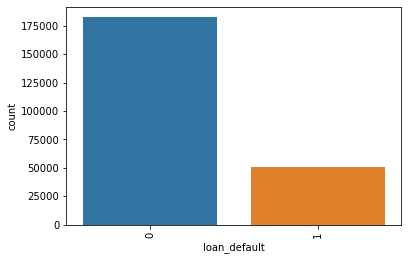

0    182543
1     50611
Name: loan_default, dtype: int64

In [15]:
# распределение таргета. Видно, что классы дисбалансны

sns.countplot(x='loan_default', data=df_eda)
plt.xticks(rotation=90)
plt.show()

df['loan_default'].value_counts()

## 1.2 Считывание датасета 

In [2]:
%%time
'''
Функция для предварительной обработки датасета:
1) Заполнение пустых значений в поле "Employment.Type"
2) Удаление столбцов с ID
3) Перевод столбцов в датами в формат дат
4) LabelEncoding
5) Удаление дубликатов и строк с пустыми значениями
'''

df_pr = pd.read_csv('train_LTFS.csv')

def preprocess_df(df):
    print('Start...')
    df['Employment.Type'].fillna('Salaried', inplace=True)
    df.drop_duplicates(inplace=True)
    df.drop(['MobileNo_Avl_Flag', 'PRI.CURRENT.BALANCE'], axis=1, inplace=True)
    
    drops = [col for ind, col in enumerate(df.columns) if re.search('id', col.lower())]
    df.drop(drops, axis=1, inplace=True)

    
    print('Find dates...')
    df['AVERAGE.ACCT.AGE'] = [int(re.findall('[0-9]+', len_hist)[0])*12 + int(re.findall('[0-9]+', len_hist)[1]) 
                              for len_hist in df['AVERAGE.ACCT.AGE']]
    
    df['CREDIT.HISTORY.LENGTH'] = [int(re.findall('[0-9]+', len_hist)[0])*12 + int(re.findall('[0-9]+', len_hist)[1]) 
                              for len_hist in df['CREDIT.HISTORY.LENGTH']]
    
    print('To datetime...')
    df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], errors='coerce').dt.year
    df['Date.of.Birth'] = df['Date.of.Birth'].apply(lambda x: x - 100 if x >= 2005 else x)
    
    df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], errors='coerce')
    df['Disbursal_day'] = df['DisbursalDate'].dt.day
    df['Disbursal_day_week'] = df['DisbursalDate'].dt.dayofweek
    df['Disbursal_month'] = df['DisbursalDate'].dt.month
    df.drop('DisbursalDate', axis=1, inplace=True)
    
    print('Label Encoder...')
    df['Employment.Type'] = LabelEncoder().fit_transform(df['Employment.Type'])
    df['PERFORM_CNS.SCORE.DESCRIPTION'] = LabelEncoder().fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])
    
    df.dropna(axis=0, inplace=True)
    print('End')
    
    return df

df = preprocess_df(df_pr)
print()

Start...
Find dates...
To datetime...
Label Encoder...
End

CPU times: total: 15 s
Wall time: 15 s


In [3]:
# Удаляем выбросы с помощью Z-score
df_pr = pd.read_csv('train_LTFS.csv')

z = np.abs(stats.zscore(df))
data_clean = df[(z < 3).all(axis=1)]

print(f'размерность оригинального датасета {df_pr.shape}')
print(f'размерность после предобработки {data_clean.shape}')

data_clean.head()

размерность оригинального датасета (233154, 41)
размерность после предобработки (174993, 33)


,disbursed_amount,asset_cost,ltv,Date.of.Birth,Employment.Type,Aadhar_flag,PAN_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Disbursal_day,Disbursal_day_week,Disbursal_month
1,47145,65550,73.23,1985,1,1,0,0,0,598,...,0,0,1,23,23,0,1,26,2,9
3,57513,66113,88.48,1993,1,1,0,0,0,305,...,0,0,0,8,15,1,1,26,4,10
4,52378,60300,88.39,1977,1,1,0,0,0,0,...,0,0,0,0,0,1,1,26,2,9
5,54513,61900,89.66,1990,1,1,0,0,0,825,...,0,0,0,21,24,0,0,19,2,9
6,46349,61500,76.42,1988,0,1,0,0,0,0,...,0,0,0,0,0,0,0,23,6,9


## 1.3 Выбор признаков

In [4]:
%%time

'Определим переменные, которые сильнее всего влияют на loan_default и их оптимальное количество'

y = data_clean.loan_default
x = data_clean.drop('loan_default', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25)


log = Pipeline(steps=[('sc', MinMaxScaler()),
                              ('sl', SelectKBest(score_func=f_classif, k=2)),
                              ('model', LogisticRegression())])

log.fit(x_train, y_train)
                       
param_grid = {'sl__k': [8, 10, 12, 14, 16, 18, 20, 22, 24, 26]}     
                
search_log = GridSearchCV(log, 
                             param_grid, 
                             cv=5, 
                             n_jobs=-1, 
                             scoring='roc_auc', 
                             refit=True, 
                             verbose=10)
                
search_log.fit(x_train, y_train)

print()
print(f'Оптимальное количество параметров - {search_log.best_estimator_[1]}')
print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Оптимальное количество параметров - SelectKBest(k=26)

CPU times: total: 2.97 s
Wall time: 14.2 s


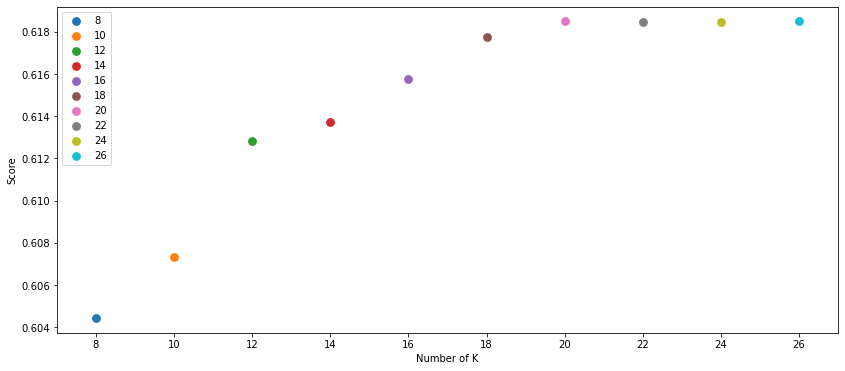

In [5]:
# график точности от количества выбранных факторов
plt.subplots(figsize=(14, 6))

sns.pointplot(x=search_log.cv_results_['param_sl__k'], 
              y=search_log.cv_results_['mean_test_score'],
             hue=search_log.cv_results_['param_sl__k'])

plt.xlabel('Number of K')
plt.ylabel('Score')
plt.show()

In [6]:
# выбранные колонки (возьмем 20, так как факторов меньше, а точноть та же)
select = SelectKBest(score_func=f_classif, k=20)
best = select.fit_transform(x, y)

columns_imp=x.columns[select.get_support()].to_list()
columns_imp

['disbursed_amount',
 'asset_cost',
 'ltv',
 'Date.of.Birth',
 'Employment.Type',
 'Aadhar_flag',
 'PERFORM_CNS.SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'Disbursal_day']

In [7]:
# нормируем данные
for ind, val in enumerate(data_clean[columns_imp]):
    data_clean[val] = np.log1p(data_clean[val])

In [97]:
'''
Также была реализация выделения важных признаков с помощью RandomForestClassifier, 
но SelectKBest показало лучшие результаты
'''

# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# forest_importances = pd.Series(importances, index=x.columns.to_list())
# colors = []
# columns_imp = []
# for ind, imp in enumerate(forest_importances):
#     if imp >=0.04:
#         colors.append('green')
#         columns_imp.append(forest_importances.index[ind])        
#     else: 
#         colors.append('blue')


# fig, ax = plt.subplots(figsize=(15, 8))
# forest_importances.plot.bar(yerr=std, ax=ax, color=colors)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()
print()

# 2. AutoML

In [134]:
# !pip uninstall scikit-learn -y
# !pip uninstall numpy -y
# !pip install scikit-learn==0.23.2
# !pip install numpy==1.20
# !pip install pycaret

# import pycaret
# from pycaret.classification import *
# from pycaret.utils import enable_colab
# enable_colab()

In [135]:
# import h2o
# from h2o.automl import H2OAutoML

Воспользуемся библиотекой LightAutoML для нахождения предварительной оценки по моделям.
В данном случае, не используется библиотека PyCaret, которая была в прошлый раз, так как не показывает высокую производительность на больших датасетах

In [10]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [11]:
# Считывание датасета, небольшая очистка, удаление столбцов с id
df_auto = pd.read_csv('train_LTFS.csv')

df_auto.drop(['MobileNo_Avl_Flag', 'PRI.CURRENT.BALANCE'], axis=1, inplace=True)
ids = [col for ind, col in enumerate(df_auto.columns) if re.search('id', col.lower())]
df_auto.drop(ids, axis=1, inplace=True)
df_auto.drop_duplicates(inplace=True)
df_auto.dropna(axis=0, inplace=True)

print(('df shape - {}'.format(df_auto.shape)))


xx = df_auto.drop('loan_default', axis=1)
yy = df_auto.loan_default

x_train, x_test, y_train, y_test = train_test_split(xx, yy,
                                                    stratify=yy, test_size=0.25)

x_train['loan_default'] = y_train
x_train.shape, y_train.shape, x_test.shape, y_test.shape

df shape - (225491, 31)


((169118, 31), (169118,), (56373, 30), (56373,))

In [268]:
roles = {
    'target': 'loan_default',
}

automl = TabularAutoML(
    task=Task('binary'),
    timeout=60*3,
    reader_params={'n_jobs': 6, 'cv': 5, 'random_state': 101}
)

rd = ReportDeco('TabReport2')
automl_rd = rd(automl)

models = automl_rd.fit_predict(x_train, roles=roles, verbose=1)

[19:23:15] Stdout logging level is INFO.
[19:23:15] Task: binary

[19:23:15] Start automl preset with listed constraints:
[19:23:15] - time: 300.00 seconds
[19:23:15] - CPU: 4 cores
[19:23:15] - memory: 16 GB

[19:23:15] Train data shape: (169118, 31)

[19:23:45] Layer 1 train process start. Time left 269.75 secs
[19:23:51] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[19:24:05] Time limit exceeded after calculating fold 3

[19:24:05] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.6354292131323951
[19:24:05] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[19:24:05] Time left 250.11 secs

[19:24:08] Selector_LightGBM fitting and predicting completed
[19:24:15] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[19:24:34] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.6461388644488824
[19:24:34] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[19:24:34] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.0

<AxesSubplot:xlabel='Feature'>

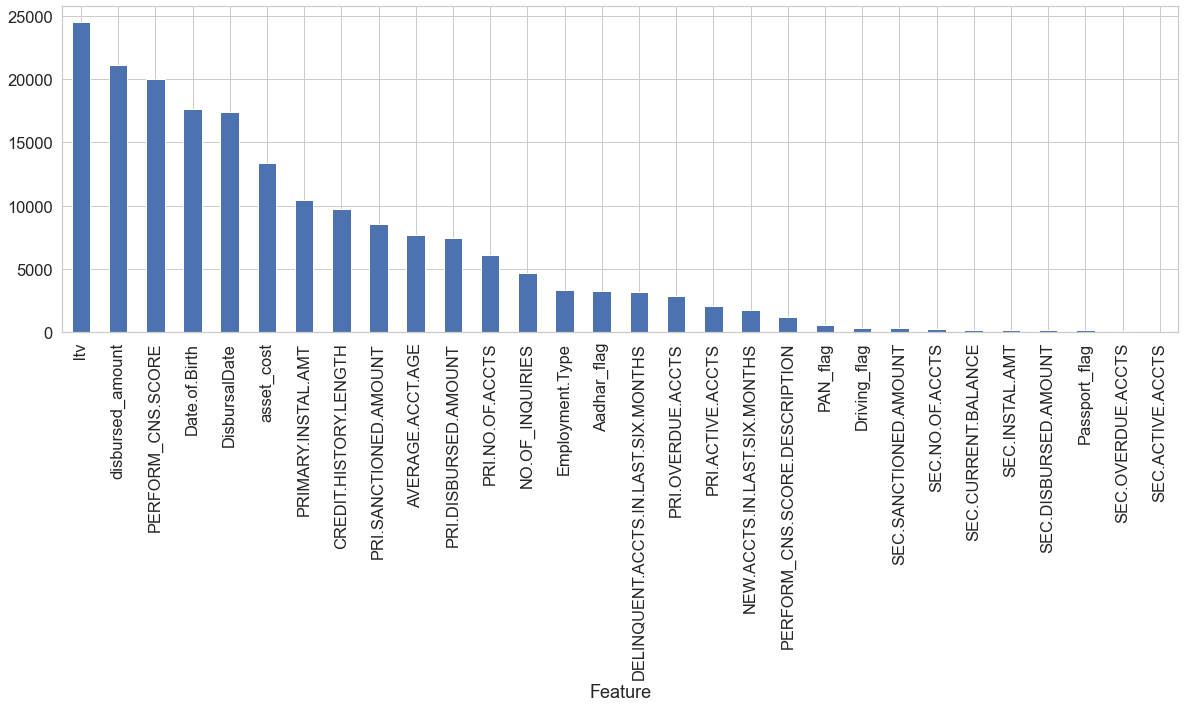

In [269]:
imps = automl_rd.model.get_feature_scores('fast')
imps.set_index('Feature')['Importance'].plot.bar(figsize=(20, 6))

In [270]:
imps.head(10)

,Feature,Importance
0,ltv,24514.055717
1,disbursed_amount,21066.907694
2,PERFORM_CNS.SCORE,20027.043957
3,Date.of.Birth,17636.558281
4,DisbursalDate,17380.054537
5,asset_cost,13405.197592
6,PRIMARY.INSTAL.AMT,10461.719209
7,CREDIT.HISTORY.LENGTH,9730.959504
8,PRI.SANCTIONED.AMOUNT,8524.043059
9,AVERAGE.ACCT.AGE,7671.993707


In [275]:
preds = automl.predict(x_test)

print(f'AUC score on train: {roc_auc_score(y_train.values, models.data[:, 0])}')
print(f'GINI score on train: {roc_auc_score(y_train.values, models.data[:, 0])*2-1}')
print()
print(f'AUC score on test: {roc_auc_score(y_test.values, preds.data[:, 0])}')
print(f'GINI score on test: {roc_auc_score(y_test.values, preds.data[:, 0])*2-1}')

AUC score on train: 0.6493588664101343
GINI score on train: 0.2987177328202686

AUC score on test: 0.6503250553387429
GINI score on test: 0.3006501106774857


Final prediction for new objects (level 0) =

>	 0.19636 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
>	 0.10541 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
>	 0.31304 * (3 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
>	 0.38519 * (4 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost)

Так выглядит финальная модель (несколько моделей с весами).

**AUC на тестовой выборке состовляет 0.65**

# 3. Модели

In [8]:
# функция для оценки моделей
def get_report(pipe, x_test, y_test, pipe_grid=None, grid=False):
    
    predictions = pipe.predict(x_test)
    predictions = np.round(predictions.ravel(), 0)

    roc_auc_scores_pipe = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
    gini = (2 * roc_auc_scores_pipe) - 1
    
    print('y_test - ', Counter(y_test))
    print('predictions - ', Counter(predictions))
    print()
    print(f'roc_auc_score - {round(roc_auc_scores_pipe, 4)}')
    print('Gini - ', round(gini, 4))
    
    if grid:
        roc_auc_scores_grid = roc_auc_score(y_test, pipe_grid.predict_proba(x_test)[:, 1])
        print(f'grid - pipe: {round(roc_auc_scores_grid - roc_auc_scores_pipe, 5)}')
        gini2 = (2 * roc_auc_scores_grid) - 1 - gini
        print('Gini with grid - ', round(gini2, 4))

    print()
    print((classification_report(y_test, predictions)))

In [9]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss, TomekLinks

In [10]:
%%time

# исправляем дисбаланс классов с помощью создания дополнительных данных
# и выбранных признаков

data_clean=data_clean[columns_imp+['loan_default']]

y = data_clean.loan_default
x = data_clean.drop('loan_default', axis=1)

imbalance = SMOTETomek(sampling_strategy='minority', n_jobs=6)
x_imb, y_imb = imbalance.fit_resample(x, y)

x_imb.shape, y_imb.shape

CPU times: total: 6min 25s
Wall time: 1min 8s


((261022, 20), (261022,))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_imb, y_imb, stratify=y_imb, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((195766, 20), (195766,), (65256, 20), (65256,))

## 3.1 LogisticRegression

In [12]:
# построим матрицу корреляций и выделим те признаки, которые имеют высокую корреляцию с таргетом

corr = pd.concat([x_train, y_train], axis=1).corr()

lin_columns = corr['loan_default'][abs(corr['loan_default'])>=0.05].index[:-1]

lin_x_train = x_train[lin_columns]
lin_x_test = x_test[lin_columns]

print('признаки с наибольшей корреляцией:', lin_x_train.columns)

# видно, что признаков с высокой корреляцией нет, порог 0.05
# (больше 0.11 признаков нет)

признаки с наибольшей корреляцией: Index(['disbursed_amount', 'ltv', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.NO.OF.ACCTS', 'PRI.OVERDUE.ACCTS'],
      dtype='object')


In [24]:
pipe_logreg = Pipeline(steps=[('sc', MinMaxScaler()),
                       ('model', LogisticRegression(max_iter=1000, C=120, solver='lbfgs', tol=0.5))])

pipe_logreg.fit(x_train, y_train)

get_report(pipe=pipe_logreg, x_test=x_test, y_test=y_test)
print()

y_test -  Counter({0: 32628, 1: 32628})
predictions -  Counter({1: 36740, 0: 28516})

roc_auc_score - 0.6272
Gini -  0.2543

              precision    recall  f1-score   support

           0       0.61      0.53      0.57     32628
           1       0.58      0.66      0.62     32628

    accuracy                           0.59     65256
   macro avg       0.60      0.59      0.59     65256
weighted avg       0.60      0.59      0.59     65256




In [70]:
param_grid = {
    'model__C': np.arange(70, 150, 10),
    'model__tol': np.linspace(0.0001, 0.9, 10),
    'model__solver': ['lbfgs',],
    'model__class_weight': ['balanced'],
}

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
%%time
search_logreg = RandomizedSearchCV(pipe_logreg, 
                             param_grid, 
                             cv=5, 
                             n_jobs=-1, 
                             scoring='roc_auc', 
                             refit='roc_auc', 
                             verbose=3)

search_logreg.fit(x_train, y_train)

print(search_logreg.best_params_)
print('------------')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'model__tol': 0.9, 'model__solver': 'lbfgs', 'model__class_weight': 'balanced', 'model__C': 70}
------------
CPU times: total: 4.92 s
Wall time: 36.7 s


In [73]:
dict_log = {}
for key in search_logreg.best_params_:
    k = key.split('__')[-1]
    dict_log[k] = search_logreg.best_params_.get(key)
print('params:', dict_log)
    
best_search = LogisticRegression(**dict_log)
best_search.fit(x_train, y_train)

pred_search = best_search.predict(x_test)
pred_search = np.round(pred_search.ravel(), 0)

auc_pred_search = roc_auc_score(y_test, best_search.predict_proba(x_test)[:, 1])
auc_pred_search

params: {'tol': 0.9, 'solver': 'lbfgs', 'class_weight': 'balanced', 'C': 70}


0.6244236545674249

In [ ]:
# RandomizedSearchCV не дал улучшения результата

In [74]:
cv_pipe_logreg = cross_val_predict(best_search,
                                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                   X=x_train,
                                   y=y_train,
                                   verbose=1,
                                   n_jobs=-1,
                                   method='predict_proba')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [75]:
print(f'auc score = {roc_auc_score(y_train, cv_pipe_logreg[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_train, cv_pipe_logreg[:, 1])) - 1 :.5f}')

auc score = 0.62228
Gini      = 0.24455


In [76]:
best_search.coef_[0]

array([ 1.43873441, -0.83641356,  1.16152828, -1.61279216,  0.25499751,
       -0.38855242,  0.13442273,  0.35637231, -0.29048477,  0.0046433 ,
        0.38282513, -0.01652208, -0.00726157,  0.02121512, -0.0934081 ,
        0.27894553,  0.14743184, -0.21182374,  0.30589476,  0.13146429])

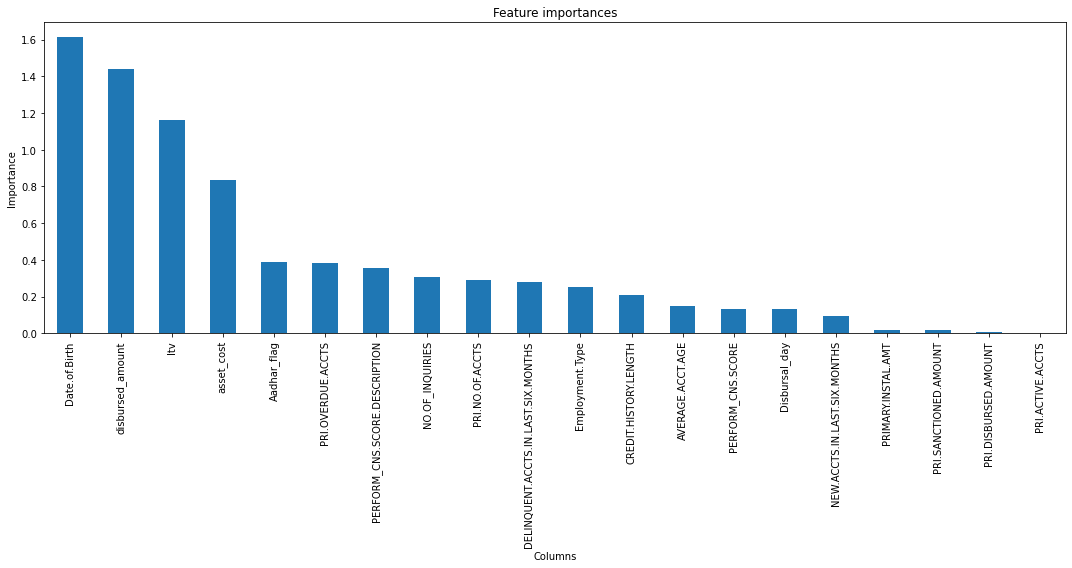

In [77]:
log_importances = pd.Series(abs(best_search.coef_[0]), index=x_train.columns) \
                                        .sort_values(0, ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
log_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_xlabel('Columns')
ax.set_ylabel('Importance')
fig.tight_layout()

In [78]:
pd.DataFrame(log_importances).head(10)

,0
Date.of.Birth,1.612792
disbursed_amount,1.438734
ltv,1.161528
asset_cost,0.836414
Aadhar_flag,0.388552
PRI.OVERDUE.ACCTS,0.382825
PERFORM_CNS.SCORE.DESCRIPTION,0.356372
NO.OF_INQUIRIES,0.305895
PRI.NO.OF.ACCTS,0.290485
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.278946


In [ ]:
# Модель плохо работает, не получилось достигнуть хорошего результата.
# также, результат ниже, чем у AutoML

# поиск гиперпараметров тоже не дал результатов

## 3.2 LinearRegression

In [113]:
pipe_linreg = Pipeline(steps=[('scaler', MinMaxScaler()), 
                       ('logistic', LinearRegression(positive=True, fit_intercept=True))])

pipe_linreg.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic', LinearRegression(positive=True))])

In [114]:
predictions = pipe_linreg.predict(x_test)
diff = predictions - y_test

print('MSE:', np.mean(diff**2))
print('MAE:', np.mean(abs(diff)))
print('RMSE:', np.sqrt(np.mean(diff**2)))
print()
print(classification_report(y_test, np.round(predictions.ravel(), 0)))

MSE: 0.2393070272020046
MAE: 0.4785918892523111
RMSE: 0.48919017488294325

              precision    recall  f1-score   support

           0       0.60      0.51      0.55     32631
           1       0.57      0.65      0.61     32632

    accuracy                           0.58     65263
   macro avg       0.59      0.58      0.58     65263
weighted avg       0.59      0.58      0.58     65263



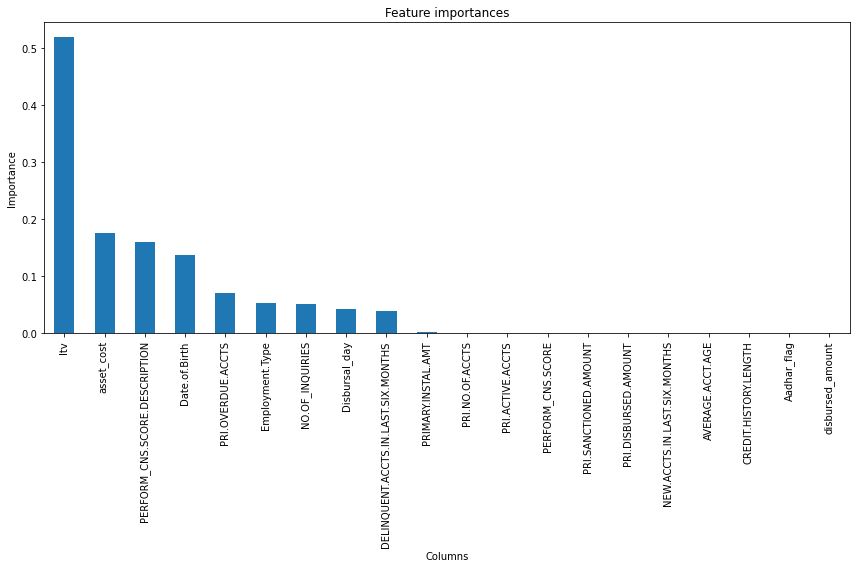

In [115]:
log_importances = pd.Series(abs(pipe_linreg[-1].coef_), index=x_train.columns) \
                                .sort_values(0, ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
ax = log_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_xlabel('Columns')
ax.set_ylabel('Importance')
fig.tight_layout()

In [90]:
pd.DataFrame(log_importances).head(10)

,0
ltv,0.272796
asset_cost,0.105896
PERFORM_CNS.SCORE.DESCRIPTION,0.102843
Date.of.Birth,0.071936
PRI.OVERDUE.ACCTS,0.054049
NO.OF_INQUIRIES,0.048382
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.040746
Employment.Type,0.027957
Disbursal_day,0.021530
PRI.ACTIVE.ACCTS,0.000000


In [ ]:
# Аналогично LinearRegression - плохой результат

## 3.3 RandomForestClassifier

In [106]:
pipe_rforest = Pipeline(steps=[
    ('sc', MinMaxScaler()), 
    ('m', RandomForestClassifier(verbose=1, 
                                 n_jobs=-1,
                                 criterion='gini',
                                 n_estimators=100))
])

pipe_rforest.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.5s finished


Pipeline(steps=[('sc', MinMaxScaler()),
                ('m', RandomForestClassifier(n_jobs=-1, verbose=1))])

In [107]:
get_report(pipe=pipe_rforest, x_test=x_test, y_test=y_test)
print()

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s


y_test -  Counter({1: 32632, 0: 32631})
predictions -  Counter({0: 33738, 1: 31525})

roc_auc_score - 0.9077
Gini -  0.8153

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     32631
           1       0.84      0.81      0.83     32632

    accuracy                           0.83     65263
   macro avg       0.83      0.83      0.83     65263
weighted avg       0.83      0.83      0.83     65263




[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished


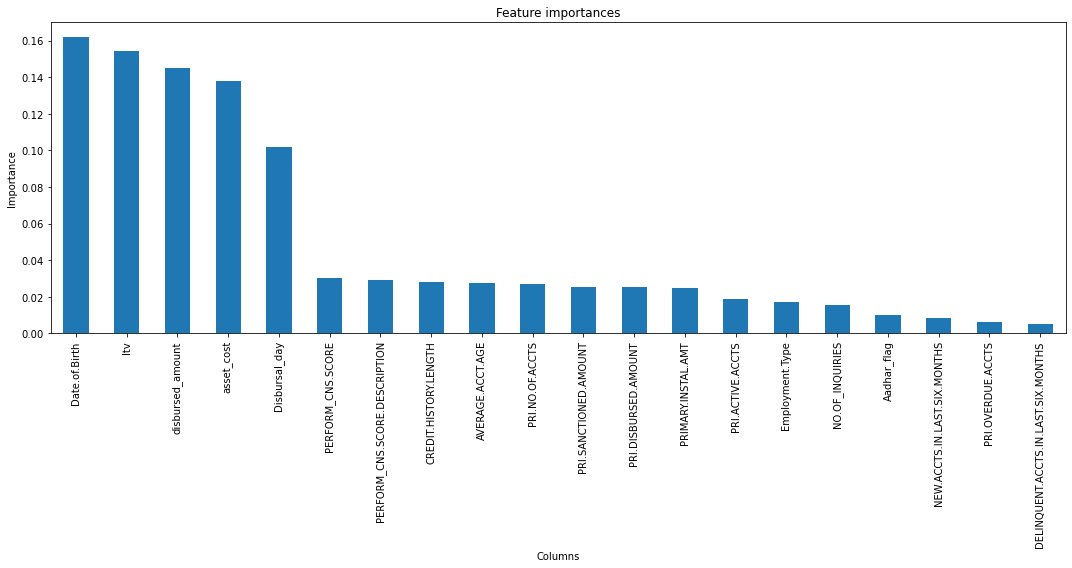

In [118]:
importances = pipe_rforest[-1].feature_importances_

forest_importances = pd.Series(importances, index=x_train.columns).sort_values(0, ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
forest_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_xlabel('Columns')
ax.set_ylabel('Importance')
fig.tight_layout()

In [64]:
%%time
cv_pipe_rforest = cross_val_predict(pipe_rforest,
                                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                    X=x_train,
                                    y=y_train,
                                    verbose=10,
                                    n_jobs=-1,
                                    method='predict_proba')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.4s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   56.5s remaining:   37.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.6s finished


CPU times: total: 93.8 ms
Wall time: 57 s


In [65]:
print(f'auc score = {roc_auc_score(y_train, cv_pipe_rforest[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_train, cv_pipe_rforest[:, 1]) - 1) :.5f}')

auc score = 0.89395
Gini      = 0.78790


In [ ]:
# модель RandomForestClassifier показала высокие результаты по AUC - 0.9
# также, быда проверка через кросс-валидацию, AUC чуть ниже и состовляет 0.894


# y_test -  Counter({1: 32649, 0: 32648}) - количество дефолтов в y_test
# predictions -  Counter({0: 33755, 1: 31542}) - количество дефолтов в предсказаниях модели

## 3.4 LGBMClassifier

In [119]:
pipe_lgbm_cls = Pipeline(steps=[('sc', MinMaxScaler()), 
                                ('model', LGBMClassifier(boosting_type='gbdt',
                                                         objective='binary' ,
                                                         n_estimators=1500,
                                                         max_depth=-1,
                                                         learning_rate=0.95,
                                                         num_leaves=90,
                                                         importance_type='gain'))])

pipe_lgbm_cls.fit(x_train, y_train)

Pipeline(steps=[('sc', MinMaxScaler()),
                ('model',
                 LGBMClassifier(importance_type='gain', learning_rate=0.95,
                                n_estimators=1500, num_leaves=90,
                                objective='binary'))])

In [120]:
get_report(pipe=pipe_lgbm_cls, x_test=x_test, y_test=y_test)
print()

y_test -  Counter({1: 32632, 0: 32631})
predictions -  Counter({0: 35681, 1: 29582})

roc_auc_score - 0.8846
Gini -  0.7692

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     32631
           1       0.86      0.78      0.82     32632

    accuracy                           0.82     65263
   macro avg       0.83      0.82      0.82     65263
weighted avg       0.83      0.82      0.82     65263




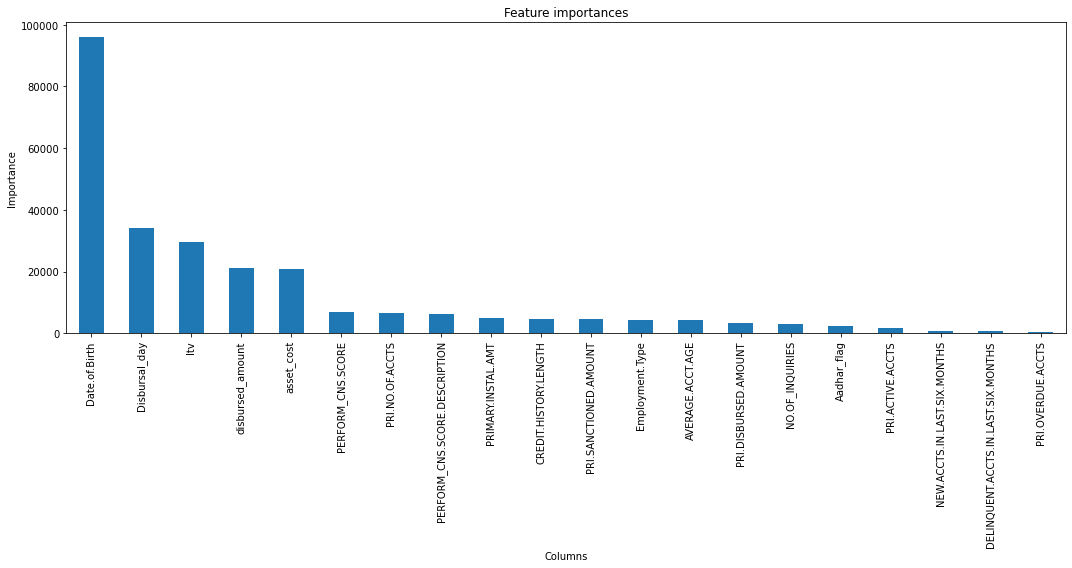

In [122]:
importances = pipe_lgbm_cls[-1].feature_importances_

forest_importances = pd.Series(importances, index=x_train.columns).sort_values(0, ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
forest_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_xlabel('Columns')
ax.set_ylabel('Importance')
fig.tight_layout()

In [123]:
pd.DataFrame(forest_importances).head(10)

,0
Date.of.Birth,95965.921371
Disbursal_day,34315.698341
ltv,29626.575930
disbursed_amount,21335.191921
asset_cost,20953.833653
PERFORM_CNS.SCORE,6910.556321
PRI.NO.OF.ACCTS,6712.741607
PERFORM_CNS.SCORE.DESCRIPTION,6268.005409
PRIMARY.INSTAL.AMT,4923.409837
CREDIT.HISTORY.LENGTH,4675.076844


In [71]:
%%time
cv_lgbm_cls = cross_val_predict(pipe_lgbm_cls,
                                    cv=StratifiedKFold(n_splits=5, shuffle=True),
                                    X=x_train,
                                    y=y_train,
                                    verbose=10,
                                    n_jobs=-1,
                                    method='predict_proba')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.1s remaining:   49.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   33.7s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.1s finished


CPU times: total: 93.8 ms
Wall time: 35.5 s


In [72]:
print(f'auc score = {roc_auc_score(y_train, cv_lgbm_cls[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_train, cv_lgbm_cls[:, 1]) - 1) :.5f}')

auc score = 0.88456
Gini      = 0.76913


In [ ]:
# Аналогично RandomForestClassifier, показывает высокие результаты, но хуже на 0.02
# выигрывает по скорости работы у RandomForestClassifier

## 3.5 XGBClassifier

In [124]:
pipe_xgb_cls = Pipeline(steps=[('scaler', MinMaxScaler()), 
                               ('model', XGBClassifier(tree_method='gpu_hist',
                                                       objective='binary:logistic',
                                                       learning_rate=0.5,
                                                       n_estimators=50,
                                                       reg_lambda=25,
                                                       max_depth=30))])

pipe_xgb_cls.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=30, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [125]:
get_report(pipe=pipe_xgb_cls, x_test=x_test, y_test=y_test)
print()

y_test -  Counter({1: 32632, 0: 32631})
predictions -  Counter({0: 37982, 1: 27281})

roc_auc_score - 0.8926
Gini -  0.7852

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     32631
           1       0.89      0.74      0.81     32632

    accuracy                           0.83     65263
   macro avg       0.84      0.83      0.83     65263
weighted avg       0.84      0.83      0.83     65263




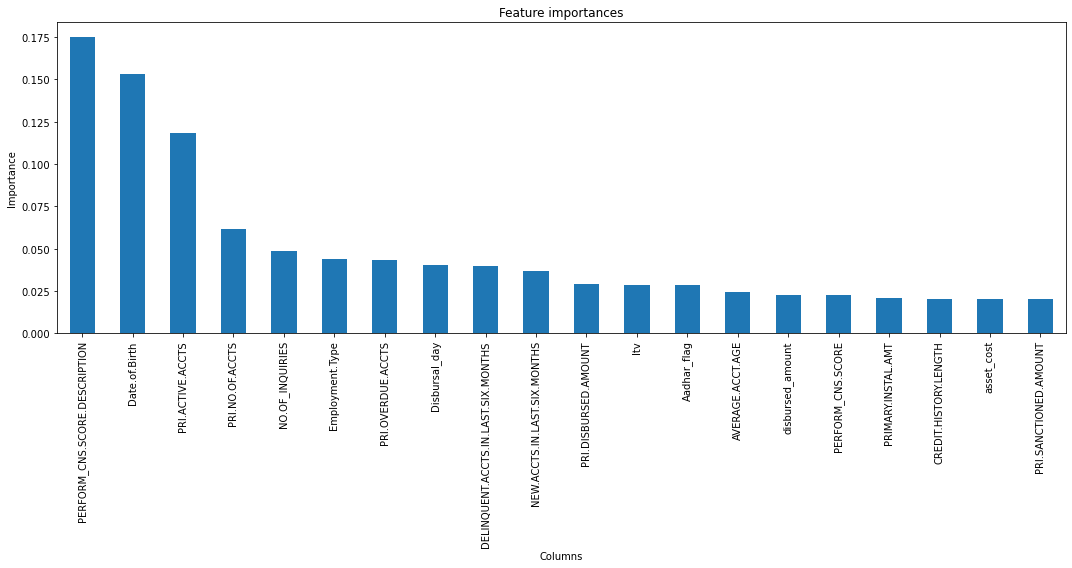

In [126]:
importances = pipe_xgb_cls[-1].feature_importances_

forest_importances = pd.Series(importances, index=x_train.columns).sort_values(0, ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
forest_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_xlabel('Columns')
ax.set_ylabel('Importance')
fig.tight_layout()

In [127]:
pd.DataFrame(forest_importances).head(10)

,0
PERFORM_CNS.SCORE.DESCRIPTION,0.174975
Date.of.Birth,0.153424
PRI.ACTIVE.ACCTS,0.118324
PRI.NO.OF.ACCTS,0.061661
NO.OF_INQUIRIES,0.048449
Employment.Type,0.043989
PRI.OVERDUE.ACCTS,0.043564
Disbursal_day,0.040523
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.039881
NEW.ACCTS.IN.LAST.SIX.MONTHS,0.036953


In [71]:
%%time
cv_xgb_cls = cross_val_predict(pipe_xgb_cls,
                                    cv=StratifiedKFold(n_splits=5, shuffle=True),
                                    X=x_train,
                                    y=y_train,
                                    verbose=10,
                                    n_jobs=-1,
                                    method='predict_proba')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   36.4s remaining:   54.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   36.7s remaining:   24.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.8s finished


CPU times: total: 109 ms
Wall time: 39.2 s


In [192]:
print(f'auc score = {roc_auc_score(y_train, cv_xgb_cls[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_train, cv_xgb_cls[:, 1]) - 1) :.5f}')

auc score = 0.89322
Gini      = 0.78644


In [ ]:
# Аналогично RandomForestClassifier и LGBMClassifier, скорость средняя, 
# результат лучше, чем у LGBMClassifier

# в целом, модели по качеству схожи

## 3.6 CatBoost

In [128]:
from catboost import CatBoostClassifier, cv, Pool, MetricVisualizer
from catboost.utils import select_threshold, get_roc_curve, get_fpr_curve, get_fnr_curve
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [129]:
x_train_cat = MinMaxScaler().fit_transform(x_train)
x_test_cat = MinMaxScaler().fit_transform(x_test)

In [130]:
model_catboost_cls = CatBoostClassifier(
    loss_function='Logloss', custom_loss='AUC', #eval_metric='AUC',
    learning_rate=0.01, iterations=5000,
    l2_leaf_reg=10, random_strength=101, depth=8,
)

m = model_catboost_cls.fit(x_train_cat, y_train, eval_set=(x_test_cat, y_test),
                       verbose=500, plot=True, early_stopping_rounds=200)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6929933	test: 0.6930089	best: 0.6930089 (0)	total: 191ms	remaining: 15m 52s
500:	learn: 0.6375135	test: 0.6407409	best: 0.6407409 (500)	total: 15.9s	remaining: 2m 22s
1000:	learn: 0.6174708	test: 0.6228903	best: 0.6228903 (1000)	total: 31.5s	remaining: 2m 5s
1500:	learn: 0.5868574	test: 0.5936812	best: 0.5936812 (1500)	total: 47.3s	remaining: 1m 50s
2000:	learn: 0.4019973	test: 0.4068929	best: 0.4068929 (2000)	total: 1m 3s	remaining: 1m 34s
2500:	learn: 0.3512499	test: 0.3565242	best: 0.3565242 (2500)	total: 1m 19s	remaining: 1m 19s
3000:	learn: 0.3402870	test: 0.3480326	best: 0.3480326 (3000)	total: 1m 35s	remaining: 1m 3s
3500:	learn: 0.3337792	test: 0.3442721	best: 0.3442721 (3500)	total: 1m 52s	remaining: 48s
4000:	learn: 0.3284280	test: 0.3416680	best: 0.3416676 (3999)	total: 2m 8s	remaining: 32.1s
4500:	learn: 0.3243488	test: 0.3402592	best: 0.3402592 (4500)	total: 2m 26s	remaining: 16.2s
4999:	learn: 0.3209271	test: 0.3394768	best: 0.3394746 (4983)	total: 2m 43s	rema

In [135]:
print(f'auc score = {roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]) - 1) :.5f}')

auc score = 0.89923
Gini      = 0.79845


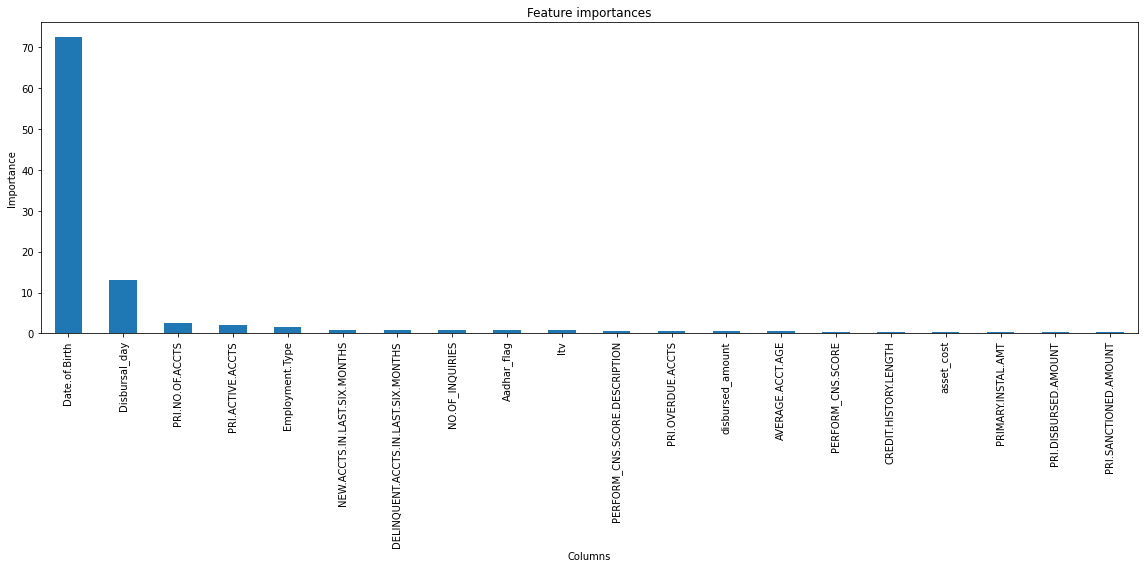

In [132]:
cat_features = pd.DataFrame(model_catboost_cls.get_feature_importance(prettified=True))
cat_features['Feature Id'] = (cat_features['Feature Id']).astype('int')
cat_features=cat_features.sort_values(by='Feature Id')

skl_iris_imp = pd.Series(cat_features.Importances.values,
                         x_train.columns).sort_values(0, ascending=False)


fig, ax = plt.subplots(figsize=(16, 8))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_xlabel('Columns')
ax.set_ylabel('Importance')
fig.tight_layout()

In [134]:
pd.DataFrame(skl_iris_imp).head(10)

,0
Date.of.Birth,72.410378
Disbursal_day,13.067299
PRI.NO.OF.ACCTS,2.509819
PRI.ACTIVE.ACCTS,2.107945
Employment.Type,1.576799
NEW.ACCTS.IN.LAST.SIX.MONTHS,0.870181
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.850130
NO.OF_INQUIRIES,0.826552
Aadhar_flag,0.787048
ltv,0.715699


График потерь

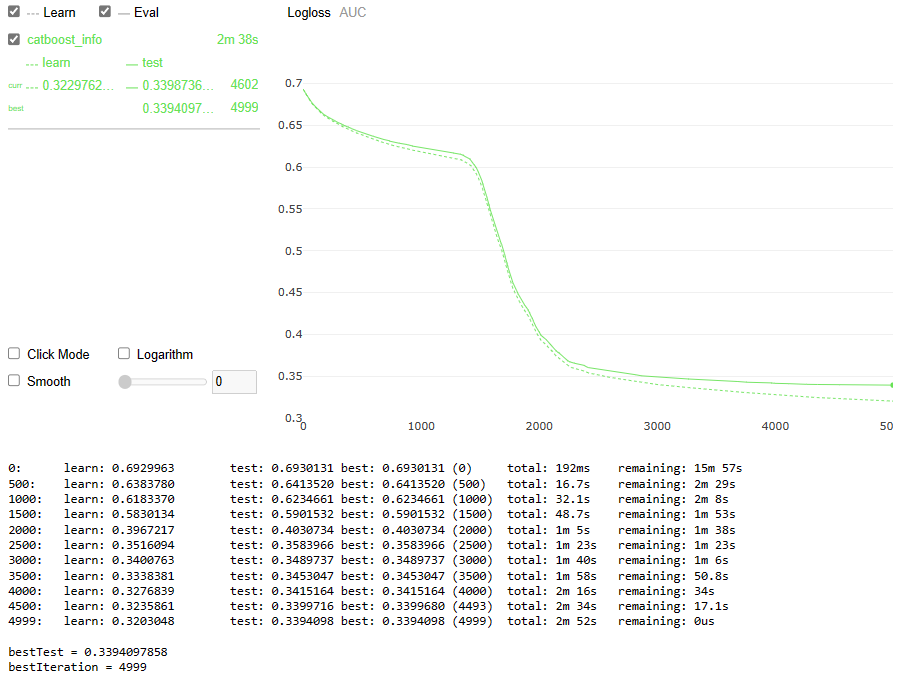

график AUC
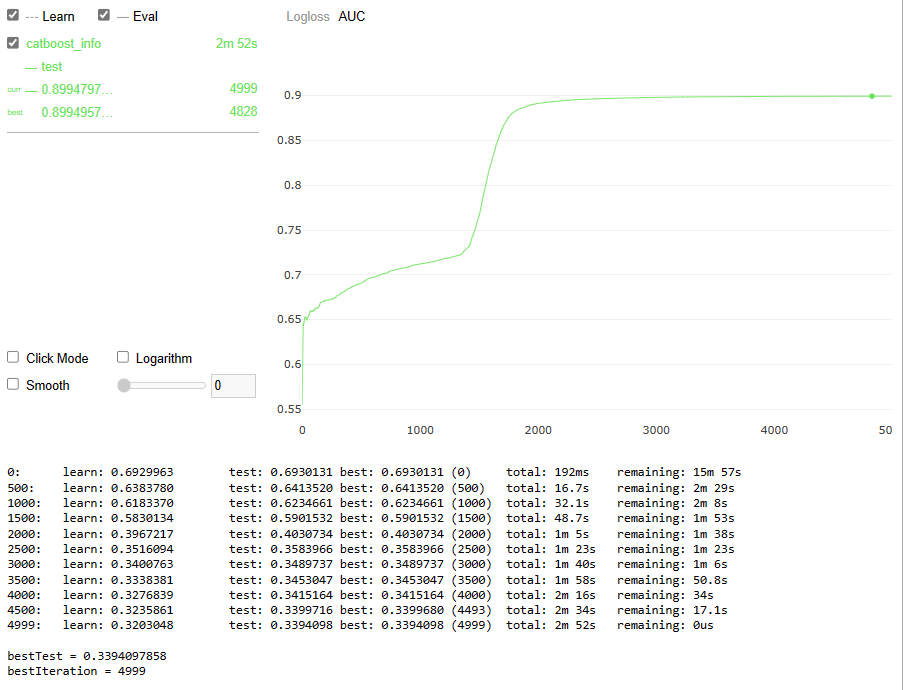

In [84]:
print(f'auc score = {roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]) - 1) :.5f}')

auc score = 0.89948
Gini      = 0.79896


In [ ]:
# модель, как и остальные бустинги, показывает хорошее качетсво
# но графики потерь и AUC не совсем "красивые"

# это связано с тем, что качетсво не падало ниже 0.65 (LogLoss) и пришлось менять L2 и глубину деревьев.
# сделать LogLoss ниже 0.35 не удалось

## 3.7 NN

In [ ]:
# для обучения нейронной сети выбрал другое количество колонок
# эти колонки чаще всего были в feature importance

columns_imp=['disbursed_amount',
 'asset_cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'Disbursal_day_week']

# нормируем данные
for ind, val in enumerate(data_clean[columns_imp]):
    data_clean[val] = np.log1p(data_clean[val])

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss, TomekLinks

data_clean=data_clean[columns_imp+['loan_default']]

y = data_clean.loan_default
x = data_clean.drop('loan_default', axis=1)

In [68]:
%%time

imbalance = SMOTETomek(sampling_strategy='minority', n_jobs=-1) # исправляем дисбаланс
x_imb, y_imb = imbalance.fit_resample(x, y)

x_imb.shape, y_imb.shape

CPU times: user 9.75 s, sys: 17.4 ms, total: 9.77 s
Wall time: 7.91 s


((250112, 6), (250112,))

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_imb, y_imb, stratify=y_imb, test_size=0.2)

x_train_sc = MinMaxScaler().fit_transform(x_train)
x_test_sc = MinMaxScaler().fit_transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200089, 6), (200089,), (50023, 6), (50023,))

In [ ]:
model = Sequential()

model.add(Dense(units = 300, input_shape = (x_train_sc.shape[1],), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

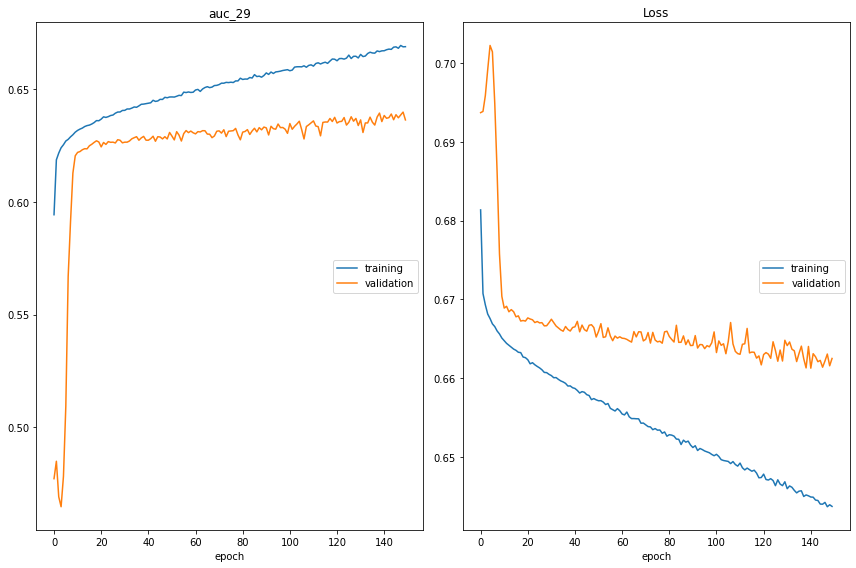

auc_29
	training         	 (min:    0.594, max:    0.669, cur:    0.669)
	validation       	 (min:    0.465, max:    0.640, cur:    0.636)
Loss
	training         	 (min:    0.644, max:    0.681, cur:    0.644)
	validation       	 (min:    0.661, max:    0.702, cur:    0.662)
74/74 [==============================] - 1s 14ms/step - loss: 0.6437 - auc_29: 0.6689 - val_loss: 0.6625 - val_auc_29: 0.6364



In [87]:
cp = ModelCheckpoint('model/', save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.0008, nesterov=True), 
# metrics=[keras.metrics.AUC()])

model.compile(loss=keras.losses.BinaryCrossentropy(), 
              optimizer=keras.optimizers.Adam(learning_rate=0.00005), 
              metrics=[keras.metrics.AUC()]
              )

history = model.fit(x_train_sc, 
                    y_train, 
                    validation_split=0.25, 
                    batch_size=2048, 
                    epochs=150, 
                    verbose=1,
                    callbacks=[cp, 
                               PlotLossesKeras(), 
                               callback])
                                 

print('\n ==============')

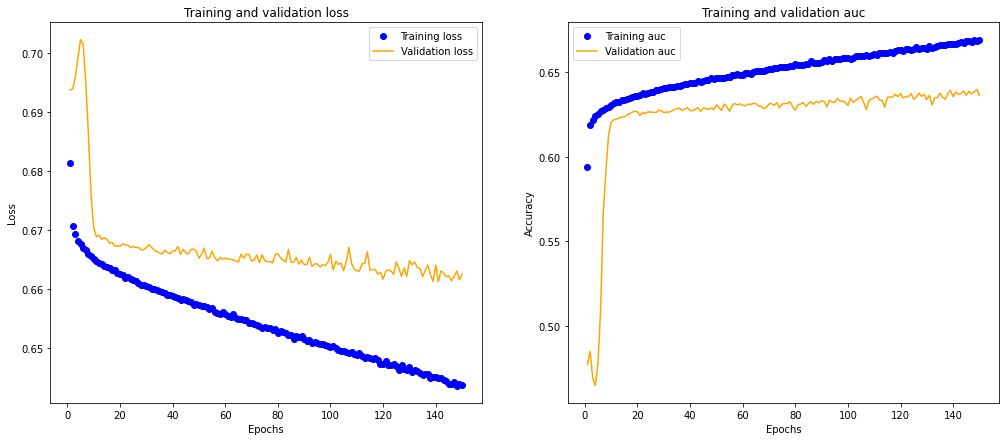


Best auc score: 0.6399089694023132


In [88]:
plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
acc = history.history[list(history.history.keys())[1]]
val_acc = history.history[list(history.history.keys())[3]]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training auc')
plt.plot(epochs, val_acc, 'orange', label='Validation auc')
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print()
print(f'Best auc score: {np.max(val_acc)}')

plt.show()

In [89]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, auc, roc_curve

model = load_model('model/')

predictions = model.predict(x_test_sc, batch_size=128)
predictions = np.round(predictions.ravel(), 0)

print()
print('auc(fpr, tpr)', auc(roc_curve(y_test, predictions)[0], roc_curve(y_test, predictions)[1]))
print()
print(classification_report(y_test, predictions))
print()
print('test loss, test acc:', model.evaluate(x_test_sc, y_test, batch_size=256))

391/391 [==============================] - 3s 6ms/step

auc(fpr, tpr) 0.5920484903482385

              precision    recall  f1-score   support

           0       0.60      0.55      0.57     25012
           1       0.58      0.63      0.61     25011

    accuracy                           0.59     50023
   macro avg       0.59      0.59      0.59     50023
weighted avg       0.59      0.59      0.59     50023


196/196 [==============================] - 1s 4ms/step - loss: 0.6674 - auc_29: 0.6253
test loss, test acc: [0.6674125790596008, 0.6252862215042114]


In [ ]:
# результаты получились плохие, аналогично CatBoost лосс не падает ниже 0.65 или падал медленно

# так как x_train имеет размерность в 200_000 строк, то можно было увеличить мини батчи, но с ними пришлось
# уменьшать и скорость обучения

# смотря на графики обучения, можно сказать, что NN с такой архитиктурой не улавливает взаимосвязей
# и не обобщает - валид-выборка идет "пилой". Кроме того, AUC на обучающей выборке тоже сильно не меняется (концентрация
# точек на графике высокая)

# увеличение количества слоев и количества нейронов не привело к улучшению результата

# 4. Результаты

## 4.1 Таблица результатов

In [136]:
da = [['LogisticRegression',
       roc_auc_score(y_test, pipe_logreg.predict_proba(x_test)[:, 1]),
       2 * roc_auc_score(y_test, pipe_logreg.predict_proba(x_test)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(pipe_logreg.predict(x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_logreg.predict(x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_logreg.predict(x_test), 0), average='weighted')[2]],
      
      ['LinearRegression',
       0,
       0,
       precision_recall_fscore_support(y_test, np.round(pipe_linreg.predict(x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_linreg.predict(x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_linreg.predict(x_test), 0), average='weighted')[2]],
      
      ['RandomForestClassifier',
       roc_auc_score(y_test, pipe_rforest.predict_proba(x_test)[:, 1]),
       2 * roc_auc_score(y_test, pipe_rforest.predict_proba(x_test)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(pipe_rforest.predict(x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_rforest.predict(x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_rforest.predict(x_test), 0), average='weighted')[2]],
      
      ['LGBMClassifier',
       roc_auc_score(y_test, pipe_lgbm_cls.predict_proba(x_test)[:, 1]),
       2 * roc_auc_score(y_test, pipe_lgbm_cls.predict_proba(x_test)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(pipe_lgbm_cls.predict(x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_lgbm_cls.predict(x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_lgbm_cls.predict(x_test), 0), average='weighted')[2]],
      
      ['XGBClassifier',
       roc_auc_score(y_test, pipe_xgb_cls.predict_proba(x_test)[:, 1]),
       2 * roc_auc_score(y_test, pipe_xgb_cls.predict_proba(x_test)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(pipe_xgb_cls.predict(x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_xgb_cls.predict(x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_xgb_cls.predict(x_test), 0), average='weighted')[2]],
 
      ['CatBoostClassifier',
       roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]),
       2 * roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(model_catboost_cls.predict(x_test_cat), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(model_catboost_cls.predict(x_test_cat), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(model_catboost_cls.predict(x_test_cat), 0), average='weighted')[2]],

      ['NN',
       0.6252862215042114,
       2 * 0.6252862215042114 - 1,
       0.59,
       0.59,
       0.59]
      
     ]

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_job

In [137]:
result = pd.DataFrame(da, columns=['Model', 'AUC', 'GINI', 'PRECISION', 'RECALL', 'FSCORE']).set_index('Model')

result.sort_values(by='GINI', ascending=False)\
.style.background_gradient(cmap=sns.light_palette('darkblue', as_cmap=True), vmin=0.762)

,AUC,GINI,PRECISION,RECALL,FSCORE
Model,,,,,
RandomForestClassifier,0.907662,0.815325,0.832309,0.831926,0.831878
CatBoostClassifier,0.899225,0.798450,0.883633,0.852872,0.849863
XGBClassifier,0.892605,0.785210,0.835682,0.826655,0.825482
LGBMClassifier,0.884591,0.769181,0.826582,0.823729,0.823343
NN,0.625286,0.250572,0.590000,0.590000,0.590000
LogisticRegression,0.624145,0.248290,0.591967,0.590457,0.588768
LinearRegression,0.000000,0.000000,0.585666,0.583976,0.581912


Лучше всего показала себя модель **RandomForestClassifier**, но остальные бустинги примерно схожи 

>    LGBMClassifier выигрывает в скорости

>    XGBClassifier - почти такой же результат, как RandomForestClassifier, но чуть быстрее

NN - не обучилась нормально, как и LogisticRegression и LinearRegression

## 4.2 Настройка лучшей модели

In [139]:
get_report(pipe=pipe_rforest, x_test=x_test, y_test=y_test)
print()

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s


y_test -  Counter({1: 32632, 0: 32631})
predictions -  Counter({0: 33738, 1: 31525})

roc_auc_score - 0.9077
Gini -  0.8153

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     32631
           1       0.84      0.81      0.83     32632

    accuracy                           0.83     65263
   macro avg       0.83      0.83      0.83     65263
weighted avg       0.83      0.83      0.83     65263




[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished


In [142]:
predictions_proba = pipe_rforest.predict_proba(x_test)[:, 1]
print('AUC on test:', roc_auc_score(y_test, predictions_proba))

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s


AUC on test: 0.9076624768563509


[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished


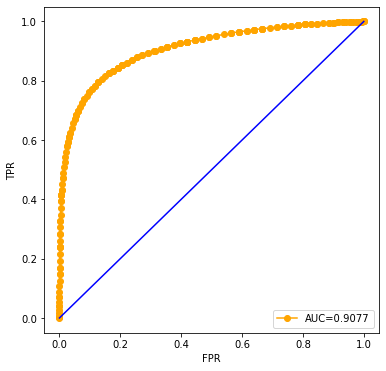

In [143]:
from sklearn.metrics import roc_curve

y_pred = pipe_rforest.predict_proba(x_test)[:, 1]
fpr, tpr, threshhold = roc_curve(y_test, y_pred, drop_intermediate=False)
auc = round(roc_auc_score(y_test, y_pred), 4)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='AUC=' + str(auc), color='orange', marker='o')
plt.plot([1, 0], [1, 0], color='blue')
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Optimal threshhold: 0.49


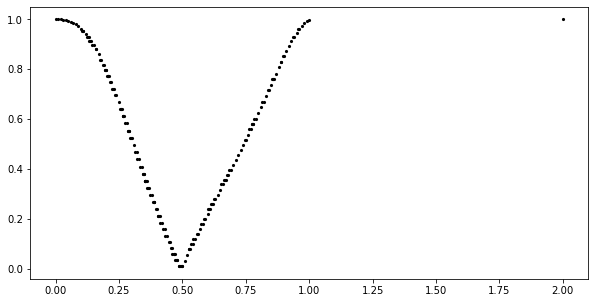

In [144]:
plt.figure(figsize=(10, 5))
plt.scatter(x=threshhold, y=abs(fpr+tpr-1), s=10, c='black', linewidth=0)

print('Optimal threshhold:', threshhold[np.argmin(np.abs(fpr+tpr-1))])

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_y_pred = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, cm_y_pred, labels=[0, 1])

# confusion_matrix basic
cm

array([[27700,  4931],
       [ 6038, 26594]], dtype=int64)

In [149]:
cm_y_pred = np.where(y_pred >  0.49, 1, 0)

cm = confusion_matrix(y_test, cm_y_pred, labels=[0, 1])

# confusion_matrix with threshhold=0.4565834480457181
cm

array([[27287,  5344],
       [ 5725, 26907]], dtype=int64)

## 4.3 Выводы

> Логистическая регрессия. В датасете нет признаков, которые линейно зависят от таргета (у всех меньше 0.15 корреляции), поиск гиперпараметров тоже не увеличило качество. Чтобы увеличить качество модели нужно генерировать новые признаки.

> Oversampling и undersampling балансирует классы таким образом, чтобы модель лучше различала 0 и 1. Если отказаться от этих методов, то можно двигать порог

> Основные методы улучшения моделей схожи с методами в третьей работе. 